In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
df = pd.read_csv('metro.csv')
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [2]:
df.describe() #exploring the given dataset for insights

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


### Generating Synthetic Dataset

In [3]:
import random
import time

Faker is a Python package that generates fake data for you. Whether you need to create datasets that contain certains types of features and targets, or anonymize data taken from a production service, Faker is for you.


In [4]:
from faker import Faker

fake = Faker()

In [5]:
def gen_data(num=1, seed=None): #this function generates fake data for our synthetic dataset

    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "land_area": np.random.randint(47, 27293),
            "percent_city" : np.random.uniform(13.4, 100),
            "percent_senior": np.random.uniform(3.8, 21.9),
            "physicians": np.random.randint(140, 25627),
            "hospital_beds": np.random.randint(481, 69678),
            "graduates": np.random.uniform(30.2, 72.9),
            "work_force": np.random.uniform(66.8, 4083.9),
            "income": np.random.randint(769, 72100),
            "region": np.random.randint(1, 4),
            "crime_rate": np.random.uniform(23.2, 85.7),
        }
        for x in range(num)
    ]
    return output

In [6]:
%%time
df2 = pd.DataFrame(gen_data(num=99, seed=0))
df2.head()

Wall time: 4.99 ms


,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,2779,64.740344,19.081210,21383,42474,56.826170,1610.899756,49369,1,40.241018
1,17136,81.963388,13.372998,24292,7402,57.876939,1546.063090,8646,3,31.971924
2,2543,98.148348,18.264770,895,1278,63.528596,541.920196,53258,2,82.241807
3,23118,22.571599,12.372168,11863,44371,49.677619,2350.256016,60069,2,32.554679
4,3607,66.826484,20.881840,18165,47003,56.377810,3691.624493,29416,2,83.813067


In [7]:
df2.to_csv("synth_metro.csv") #exporting our generated dataset to csv file

### Working on Actual Dataset

In [8]:
df = pd.read_csv('metro.csv')
df.head() #reading original dataset

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [9]:
df.describe().columns

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region',
       'crime_rate'],
      dtype='object')

<AxesSubplot:>

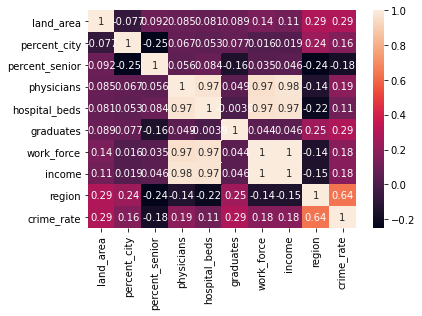

In [10]:
sb.heatmap(df.corr(), annot=True) #finding correlations between the attributes

In [31]:
## Performing a simple feature selection
X = df[['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region']].values
Y = df[['crime_rate']].values

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [33]:
linReg.fit(X_train,Y_train)

LinearRegression()

In [34]:
linReg.score(X_test,Y_test) #calculating score / R^2

0.5097754671085375

### Working on Synthesised Dataset

In [35]:
df2 = pd.read_csv('synth_metro.csv')
df2=df2.drop("Unnamed: 0",axis=1) #dropping extra column
df2.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,2779,64.740344,19.081210,21383,42474,56.826170,1610.899756,49369,1,40.241018
1,17136,81.963388,13.372998,24292,7402,57.876939,1546.063090,8646,3,31.971924
2,2543,98.148348,18.264770,895,1278,63.528596,541.920196,53258,2,82.241807
3,23118,22.571599,12.372168,11863,44371,49.677619,2350.256016,60069,2,32.554679
4,3607,66.826484,20.881840,18165,47003,56.377810,3691.624493,29416,2,83.813067


In [36]:
df2.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,13922.676768,60.441271,13.030075,13843.575758,34508.343434,50.913979,2049.159254,36325.191919,2.060606,53.403579
std,7833.447975,24.444807,5.373449,7329.091104,18975.554174,12.529008,1163.651961,18811.350266,0.818388,17.159458
min,313.000000,13.750566,3.801002,219.000000,581.000000,30.765214,82.307418,3526.000000,1.000000,23.234123
25%,6482.500000,41.740054,9.175413,7393.500000,20421.500000,40.904162,1080.610093,22207.000000,1.000000,39.074443
50%,14514.000000,62.684124,12.893249,14242.000000,35781.000000,50.476843,2009.897226,34307.000000,2.000000,53.889046
75%,20034.000000,80.806314,17.737531,19785.500000,47777.500000,60.250673,3003.513888,51462.500000,3.000000,67.356950
max,27051.000000,98.148348,21.886932,25549.000000,68040.000000,72.812988,4019.796088,72068.000000,3.000000,83.813067


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [39]:
df2.describe().columns

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region',
       'crime_rate'],
      dtype='object')

<AxesSubplot:>

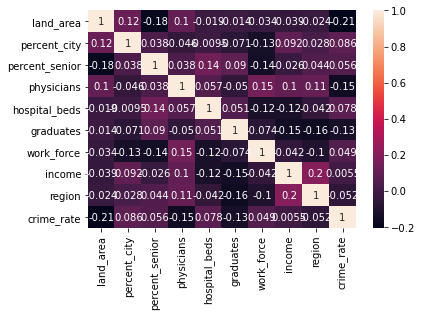

In [40]:
sb.heatmap(df2.corr(), annot=True) #finding correlations between the attributes

In [90]:
## Performing a simple feature selection
X = df2[['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region']].values
Y = df2[['crime_rate']].values

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [92]:
linReg.fit(X_train,Y_train)

LinearRegression()

In [93]:
linReg.score(X_test,Y_test) # R2 score

0.020879492515947895

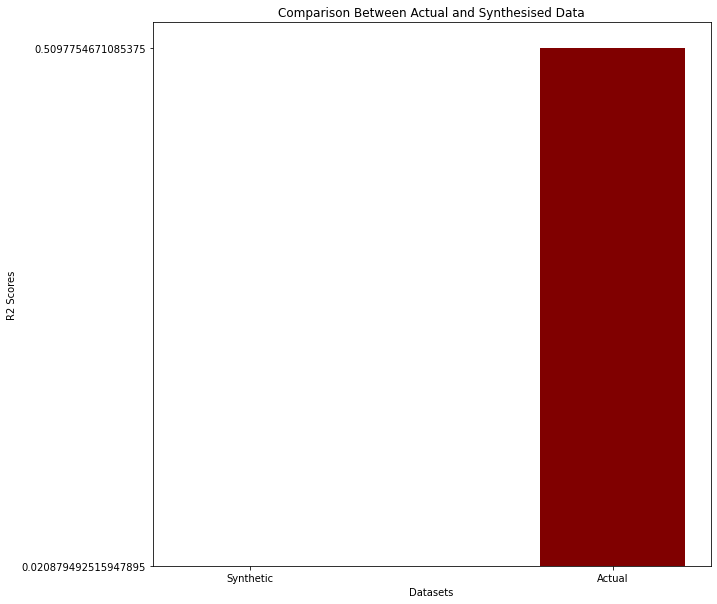

In [97]:
# comparing the results
datasets = ["Synthetic","Actual"]
values = ['0.020879492515947895','0.5097754671085375']
  
fig = plt.figure(figsize = (10, 10))
# creating the bar plot
plt.bar(datasets, values, color ='maroon',
        width = 0.4)
plt.xlabel("Datasets")
plt.ylabel("R2 Scores")
plt.title("Comparison Between Actual and Synthesised Data")
plt.show()

We can clearly observe that our basic linear regression model works better on actual dataset than compared to synthetic dataset.

The problem with creating synthetic datasets that have more than 1 feature is that there are no relationships between features, as they are random. This leads to poor quality in terms of insights as all columns are independent from each other.